In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Charger le dataset
df = pd.read_csv("X_final.csv", low_memory=False)

In [2]:
df.head()

,row_index,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,piezo_station_bss_id,piezo_measurement_date,meteo_latitude,meteo_longitude,meteo_altitude,...,piezo_measure_nature_code_N,piezo_measure_nature_code_S,hydro_status_code_8,hydro_status_code_12,hydro_status_code_16,hydro_qualification_code_16,hydro_qualification_code_20,doy,year_sinus,meteo_humidty_max
0,0,-0.439289,0.862366,1.300870,-0.265916,BSS001TTQQ,2020-01-01,1.307534,-0.300788,0.753924,...,True,False,False,False,True,False,True,1,-0.951057,2.079442
1,1,-0.045071,0.967575,1.156805,-0.173968,BSS001SCTM,2020-01-01,1.173549,-0.203915,0.559843,...,True,False,False,False,True,False,True,1,-0.951057,2.197225
2,2,-0.052477,0.771093,1.106830,-0.234836,BSS001TRPH,2020-01-01,1.090369,-0.271017,0.389905,...,True,False,False,False,True,False,True,1,-0.951057,2.079442
3,3,-0.072748,2.710245,1.374718,-0.094379,BSS001RGXM,2020-01-01,1.365437,-0.051320,1.617744,...,True,False,False,False,True,False,False,1,-0.951057,2.262639
4,4,-0.012853,1.055536,1.140881,-0.124166,BSS001RFRV,2020-01-01,1.157984,-0.097379,0.587249,...,True,False,False,True,False,False,True,1,-0.951057,2.107987


In [3]:
colonnes_a_supprimer = [
    'piezo_station_bss_id',
    'piezo_measurement_date'
]

df = df.drop(columns=colonnes_a_supprimer)

In [17]:
# Split x_dataset into x_train and x_test based on the presence of values in 'piezo_groundwater_level_category'
x_train = df[df['piezo_groundwater_level_category'].notna()]
x_test = df[df['piezo_groundwater_level_category'].isna()]

# Vérification des tailles
print(f"Size of x_train: {len(x_train)}")
print(f"Size of x_test: {len(x_test)}")

Size of x_train: 2830316
Size of x_test: 611208


In [ ]:
import pandas as pd

# Extract the required rows
x_train_subset = x_train.head(1000)
x_test_subset = x_test.head(100)

# Concatenate the two subsets
combined_df = pd.concat([x_train_subset, x_test_subset], ignore_index=True)

# Display the combined DataFrame
combined_df.to_csv(


In [5]:
y_target = x_train['piezo_groundwater_level_category']
x_train = x_train.drop(columns=['piezo_groundwater_level_category'])
x_test = x_test.drop(columns=['piezo_groundwater_level_category'])

In [6]:
# Mapping manuel des labels
label_mapping = {
    'Very Low': 0,
    'Low': 1,
    'Average': 2,
    'High': 3,
    'Very High': 4
}

# Application du mapping
y_train_encoded = y_target.map(label_mapping)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Initialisation du modèle RandomForest
rf_model = RandomForestClassifier(
    n_estimators=200,  # Nombre d'arbres dans la forêt
    max_depth=None, # Profondeur maximale des arbres
    random_state=42,  # Pour la reproductibilité des résultats
    n_jobs=-1,  # Utilisation de tous les cœurs du processeur pour l'entraînement
    verbose=1
)

cols = ['piezo_station_investigation_depth',
       'hydro_observation_result_elab', 'piezo_station_altitude',
       'piezo_station_longitude', 'piezo_station_latitude', 'doy',
       'insee_%_agri', 'year', 'year_sinus', 'hydro_longitude',
       'hydro_latitude', 'meteo_latitude', 'meteo_longitude',
       'meteo_altitude', 'month', 'meteo_temperature_avg',
       'meteo_temperature_max', 'meteo_temperature_min', 'day',
       'meteo_humidity_min', 'meteo_humidity_duration_above_80%',
       'meteo_evapotranspiration_grid', 'meteo_humidity_avg',
       'meteo_humidty_max', 'meteo_humidity_max',
       'meteo_humidity_duration_below_40%', 'meteo_rain_height',
       'piezo_measure_nature_code_N', 'hydro_status_code_16',
       'hydro_status_code_12', 'hydro_qualification_code_20',
       'piezo_status_Donnée contrôlée niveau 2',
       'hydro_qualification_code_16',
       'piezo_status_Donnée contrôlée niveau 1',
       'piezo_measure_nature_code_I', 'piezo_qualification_Non qualifié']

# Entraînement du modèle
rf_model.fit(x_train, y_train_encoded)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, verbose=1)

In [14]:
y_pred_final= rf_model.predict(x_test)

label_demapping = {
    0:'Very Low',
    1:'Low',
    2:'Average',
    3:'High',
    4:'Very High'
}
y_final=[label_demapping[pred] for pred in y_pred_final]

predictions_df = pd.DataFrame({
    'row_index': x_test.index,  # Inclure les index d'origine de x_test
    'piezo_groundwater_level_category': y_final  # Les prédictions finales
})

output_file = "y_final.csv"
predictions_df.to_csv(output_file, index=False)

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    0.9s
[Parallel(n_jobs=40)]: Done 200 out of 200 | elapsed:    1.4s finished


In [15]:
y_original = pd.read_csv("y_final_w_add.csv")
y_now = pd.read_csv("y_final.csv")
sum(y_now["piezo_groundwater_level_category"] != y_original["piezo_groundwater_level_category"])

0

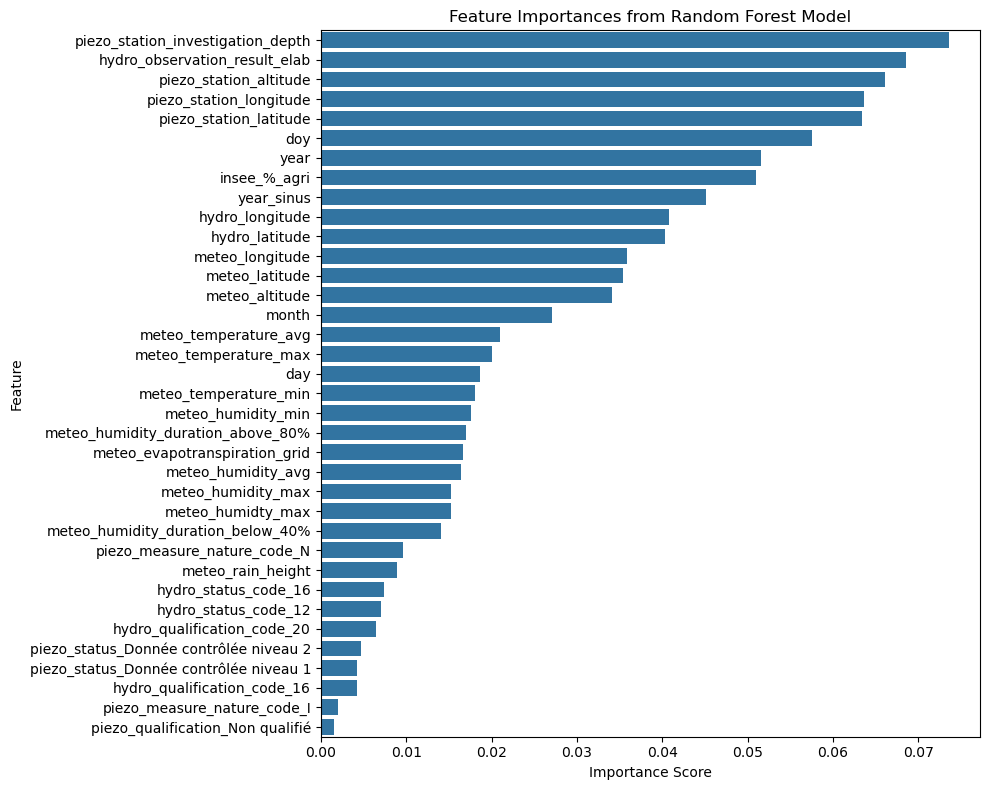

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is your training DataFrame and rf_model is your trained Random Forest model
feature_names = x_train[cols].columns
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [16]:
feature_importances[feature_importances['Importance']*100 > 0.1]['Feature'].unique()

array(['piezo_station_investigation_depth',
       'hydro_observation_result_elab', 'piezo_station_altitude',
       'piezo_station_longitude', 'piezo_station_latitude', 'doy',
       'insee_%_agri', 'year', 'year_sinus', 'hydro_longitude',
       'hydro_latitude', 'meteo_latitude', 'meteo_longitude',
       'meteo_altitude', 'month', 'meteo_temperature_avg',
       'meteo_temperature_max', 'meteo_temperature_min', 'day',
       'meteo_humidity_min', 'meteo_humidity_duration_above_80%',
       'meteo_evapotranspiration_grid', 'meteo_humidity_avg',
       'meteo_humidty_max', 'meteo_humidity_max',
       'meteo_humidity_duration_below_40%', 'meteo_rain_height',
       'piezo_measure_nature_code_N', 'hydro_status_code_16',
       'hydro_status_code_12', 'hydro_qualification_code_20',
       'piezo_status_Donnée contrôlée niveau 2',
       'hydro_qualification_code_16',
       'piezo_status_Donnée contrôlée niveau 1',
       'piezo_measure_nature_code_I', 'piezo_qualification_Non qualifié